In [1]:
pip install python-dotenv

In [2]:
from dotenv import load_dotenv
import os

# Load API key from .env file
load_dotenv()
API_KEY = os.getenv("OPENWEATHERMAP_API_KEY")

In [3]:
API_KEY = "9a997e758ee74a0542a851066a02485a"  # Replace with your actual API key

API Key: 9a997e758ee74a0542a851066a02485a
Enter city name: tirumala

Current Weather in Tirumala:
Temperature: 24.1°C
Feels like: 24.2°C
Description: overcast clouds
Humidity: 64%
Wind Speed: 2.9 m/s

Forecast for the next 5 days:
2024-07-05: 23.3°C, moderate rain
2024-07-06: 21.5°C, light rain
2024-07-07: 23.4°C, light rain
2024-07-08: 24.3°C, overcast clouds
2024-07-09: 26.2°C, overcast clouds


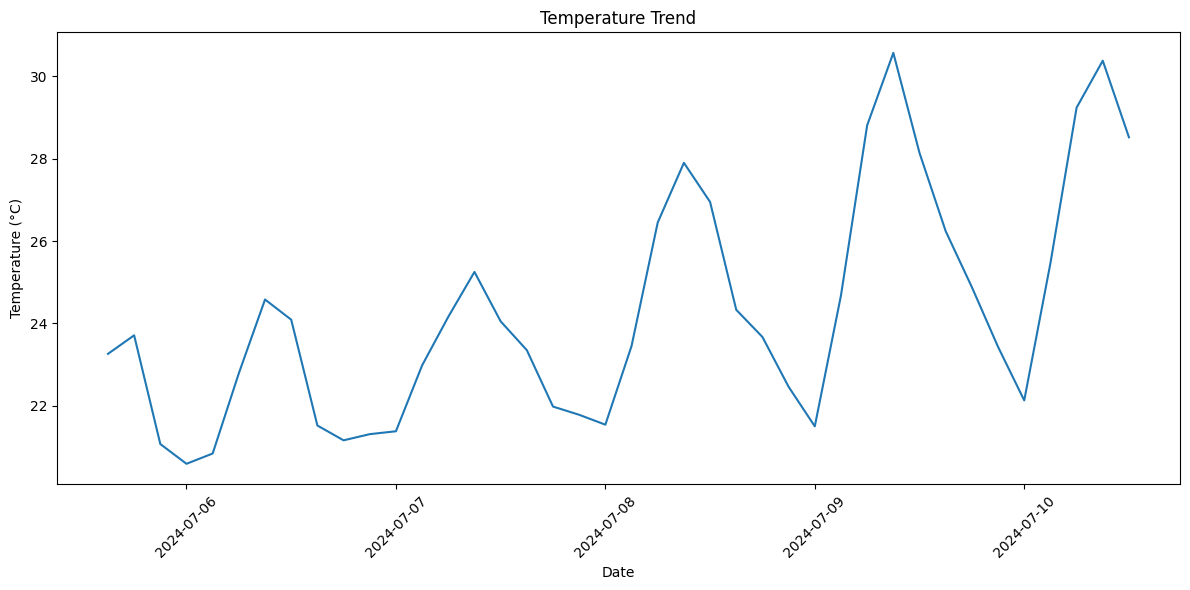

In [4]:
import requests
import datetime
import matplotlib.pyplot as plt
import os

# Replace this line with your actual API key
API_KEY = "9a997e758ee74a0542a851066a02485a"

BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
FORECAST_URL = "http://api.openweathermap.org/data/2.5/forecast?"

print(f"API Key: {API_KEY}")

def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

def get_weather(city):
    url = f"{BASE_URL}q={city}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error fetching weather data: Status code {response.status_code}")
        print(f"Response: {response.text}")
        return None

def get_forecast(city):
    url = f"{FORECAST_URL}q={city}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error fetching forecast data: Status code {response.status_code}")
        print(f"Response: {response.text}")
        return None

def display_current_weather(data):
    if data:
        temp = kelvin_to_celsius(data['main']['temp'])
        feels_like = kelvin_to_celsius(data['main']['feels_like'])
        description = data['weather'][0]['description']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']

        print(f"\nCurrent Weather in {data['name']}:")
        print(f"Temperature: {temp:.1f}°C")
        print(f"Feels like: {feels_like:.1f}°C")
        print(f"Description: {description}")
        print(f"Humidity: {humidity}%")
        print(f"Wind Speed: {wind_speed} m/s")

def display_forecast(data):
    if data:
        print("\nForecast for the next 5 days:")
        for forecast in data['list'][::8]:  # Every 24 hours (3-hour steps * 8 = 24 hours)
            date = datetime.datetime.fromtimestamp(forecast['dt'])
            temp = kelvin_to_celsius(forecast['main']['temp'])
            description = forecast['weather'][0]['description']
            print(f"{date.strftime('%Y-%m-%d')}: {temp:.1f}°C, {description}")

def plot_temperature_trend(data):
    if data:
        dates = []
        temps = []
        for forecast in data['list']:
            date = datetime.datetime.fromtimestamp(forecast['dt'])
            temp = kelvin_to_celsius(forecast['main']['temp'])
            dates.append(date)
            temps.append(temp)

        plt.figure(figsize=(12, 6))
        plt.plot(dates, temps)
        plt.title("Temperature Trend")
        plt.xlabel("Date")
        plt.ylabel("Temperature (°C)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def main():
    city = input("Enter city name: ")
    current_weather = get_weather(city)
    forecast_data = get_forecast(city)

    display_current_weather(current_weather)
    display_forecast(forecast_data)
    plot_temperature_trend(forecast_data)

if __name__ == "__main__":
    main()